# Binary Search Tree

#### A binary search tree is a rooted binary tree, whose internal nodes each store a key (and optionally, an associated value) and each have two distinguished sub-trees, commonly denoted left and right. The tree additionally satisfies the binary search property, which states that the key in each node must be greater than or equal to any key stored in the left sub-tree, and less than or equal to any key stored in the right sub-tree. The leaves (final nodes) of the tree contain no key and have no structure to distinguish them from one another. 

## Tree Terminology

#### Root - The top in a tree
#### Child - A node directly connected to another node when moving away from the Roor
#### Parent - The converse notion of a child
#### Sibling - Agroup of nodes with the same parent
#### Leaf - A node with no children

### Big O
#### Insertion - O(logN)
#### Searching - O(logN)
#### For worst cases O(N)

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Node:
    """Class to create Node of the BST"""
    
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

In [12]:
class BinarySearchTree:
    """Class to create BST"""
    
    def __init__(self):
        self.root = None
        
    
    def insert(self, value):
        """Inserting a node in a BST. Returns updated BST"""
        
        # create a new node
        new_node = Node(value)
        # check if there is a root, if not - the root now becomes
        # that new node
        if not self.root:
            self.root = new_node
            return self
        # if there is a root, check if the value of the new node is 
        # greater than or less than value of the root
        current_node = self.root
        while True:
            # if greater
            if new_node.value > current_node.value:
                # check if there is no node to the right
                if not current_node.right:
                    # add new node as the right property
                    current_node.right = new_node
                    return self
                # if there is a node move to that node
                # and repeat steps
                current_node = current_node.right
            # if it is less
            elif new_node.value < current_node.value:
                # check if there is no node to the left
                if not current_node.left:
                    # add new node as the left property
                    current_node.left = new_node
                    return self
                # if there is a node move to that node
                # and repeat steps
                current_node = current_node.left
            # if new node value equal to current one (already exist
            # in BST) than do nothing
            else:
                return None
            
    
    def contains(self, value):
        """Check if BST contains a node. Returns True or False"""
        
        # check if there is a root
        if not self.root:
            return False
        current_node = self.root
        # check nodes until there is one
        while current_node:
            # if value is less than the current node value than
            # move current node to node to the left
            if value < current_node.value:
                current_node = current_node.left
            # if value is greater than the current node value than
            # move current node to node to the right
            elif value > current_node.value:
                current_node = current_node.right
            # if value is equal to current node value
            else:
                return True
        return False
    
    
    def bfs(self):
        """
        Breadth first search. 
        Visit every node on the same BST level
        Check every sibling node before look at a child"""
        
        # 'queue' (First In First Out) to track nodes to check
        queue = []
        # list to store the values of the nodes visited
        visited = []
        # place the root node in the queue
        queue.append(self.root)
        while queue:
            # dequeue a node from the queue and 
            current_node = queue.pop(0)
            # append the value of the node into the visited list
            visited.append(current_node.value)
            # if there is a left property on the node dequeued
            if current_node.left:
                # add left node to the queue
                queue.append(current_node.left)
            # if there is a right property on the node dequeued
            if current_node.right:
                # add right node to the queue
                queue.append(current_node.right)
        return visited

    
    def nodes_connection(self):
        """
        Returns list with nodes values with left and right nodes, bst level
        in format (left value, value, value bst level, right value)
        Uses BFS approach
        """
        
        queue = []
        visited = []
        bst_level = 0
        queue.append([self.root, bst_level])
        while queue:
            
            current_node, bst_level = queue.pop(0)
            if current_node.left and current_node.right:
                visited.append((current_node.left.value, current_node.value, bst_level, current_node.right.value))
                queue.append([current_node.left, bst_level + 1])
                queue.append([current_node.right, bst_level + 1])
            elif current_node.left and not current_node.right:
                visited.append((current_node.left.value, current_node.value, bst_level, None))
                queue.append([current_node.left, bst_level + 1])
            elif current_node.right and not current_node.left:
                visited.append((None, current_node.value, bst_level, current_node.right.value))
                queue.append([current_node.right, bst_level + 1])
            else:
                visited.append((None, current_node.value, bst_level, None))
        return visited
    
    
    def nodes_interconnection(self):
        """
        Returns list with nodes values with left and right nodes, bst level
        in format (left value, value, value bst level, right value)
        Uses BFS approach
        """
        
        queue = []
        visited = []
        bst_level = 0
        queue.append([self.root, bst_level])
        while queue:
            
            current_node, bst_level = queue.pop(0)
            if current_node.left and current_node.right:
                visited.append((current_node.left, current_node, bst_level, current_node.right))
                queue.append([current_node.left, bst_level + 1])
                queue.append([current_node.right, bst_level + 1])
            elif current_node.left and not current_node.right:
                visited.append((current_node.left, current_node, bst_level, None))
                queue.append([current_node.left, bst_level + 1])
            elif current_node.right and not current_node.left:
                visited.append((None, current_node, bst_level, current_node.right))
                queue.append([current_node.right, bst_level + 1])
            else:
                visited.append((None, current_node, bst_level, None))
        return visited
    
    
    def graph(self):
        """
        Builds BST graph with node level and L(eft) or R(ight) labels 
        """
        
        nodes = self.nodes_connection()
        bst_graph = nx.DiGraph()
        if self.root:
            root_value = self.root.value
        nodes_rename_dct = {}
        for node in nodes:
            bst_graph.add_node(node[1])
            if node[0]:
                nodes_rename_dct[node[0]] = f'{node[2]+1}L: {str(node[0])}'
                bst_graph.add_node(node[0])
                bst_graph.add_edge(node[1], node[0])
            if node[3]:
                nodes_rename_dct[node[3]] = f'{node[2]+1}R: {str(node[3])}'
                bst_graph.add_node(node[3])
                bst_graph.add_edge(node[1], node[3])
        
        nodes_rename_dct[root_value] = 'ROOT: ' + str(root_value)
        print("Nodes of graph: ", bst_graph.nodes())
        bst_graph = nx.relabel_nodes(bst_graph, nodes_rename_dct)
        nx.draw(bst_graph, with_labels = True)
        plt.show()
     

    def dfs_preorder(self):
        """
        Depth First Search PreOrder
        Traverse nodes vertically down till the end of the tree
        before visiting sibling nodes.
        Visit a node first then left side checked then right side.
        Root is the first node that visited.
        """
        # list to store the values of nodes visited
        values = []
        # helper function which accepts a node
        def traverse(node):
            # append node value to the values list 
            values.append(node.value)
            # if the node has a left property, call helper
            # function with the left property on the node
            if node.left:
                traverse(node.left)
            # if the node has a right property, call helper
            # function with the right property on the node
            if node.right:
                traverse(node.right)   
        # invoke helper function with root node
        traverse(self.root)

        return values


    def dfs_postorder(self):
        """
        Depth First Search PostOrder
        Traverse nodes vertically down till the end of the tree
        before visiting sibling nodes.
        Visit a node after left and right side checked. 
        Traverse entire tree then visit a node. 
        Root is the last node that visited.
        """
        
        # list to store the values of nodes visited
        values = []
        # helper function which accepts a node
        def traverse(node):
            # if the node has a left property, call helper
            # function with the left property on the node
            if node.left:
                traverse(node.left)
            # if the node has a right property, call helper
            # function with the right property on the node
            if node.right:
                traverse(node.right)
            # append node value to the values list 
            values.append(node.value)
        # invoke helper function with root node
        traverse(self.root)
        
        return values
    
    
    def dfs_inorder(self):
        """
        Depth First Search InOrder
        Traverse nodes vertically down till the end of the tree
        before visiting sibling nodes.
        Traverse entire left side then visit a node and then traverse
        the enire right side.
        Root visited after left side checked.
        """
        
        # list to store the values of nodes visited
        values = []
        # helper function which accepts a node
        def traverse(node):
            # if the node has a left property, call helper
            # function with the left property on the node
            if node.left:
                traverse(node.left)
            # append node value to the values list 
            values.append(node.value)
            # if the node has a right property, call helper
            # function with the right property on the node
            if node.right:
                traverse(node.right)

        # invoke helper function with root node
        traverse(self.root)
        
        return values
                

    def remove(self, data):
        # empty tree
        if self.root is None:
            return False

        # data is in root node	
        elif self.root.value == data:
            if self.root.left is None and self.root.right is None:
                self.root = None
            elif self.root.left and self.root.right is None:
                self.root = self.root.left
            elif self.root.left is None and self.root.right:
                self.root = self.root.right
            elif self.root.left and self.root.right:
                delNodeParent = self.root
                delNode = self.root.right
                while delNode.left:
                    delNodeParent = delNode
                    delNode = delNode.left

                self.root.value = delNode.value
                if delNode.right:
                    if delNodeParent.value > delNode.value:
                        delNodeParent.left = delNode.right
                    elif delNodeParent.value < delNode.value:
                        delNodeParent.right = delNode.right
                else:
                    if delNode.value < delNodeParent.value:
                        delNodeParent.left = None
                    else:
                        delNodeParent.right = None

            return True

        parent = None
        node = self.root

        # find node to remove
        while node and node.value != data:
            parent = node
            if data < node.value:
                node = node.left
            elif data > node.value:
                node = node.right

        # case 1: data not found
        if node is None or node.value != data:
            return False

        # case 2: remove-node has no children
        elif node.left is None and node.right is None:
            if data < parent.value:
                parent.left = None
            else:
                parent.right = None
            return True

        # case 3: remove-node has left child only
        elif node.left and node.right is None:
            if data < parent.value:
                parent.left = node.left
            else:
                parent.right = node.left
            return True

        # case 4: remove-node has right child only
        elif node.left is None and node.right:
            if data < parent.value:
                parent.left = node.right
            else:
                parent.right = node.right
            return True

        # case 5: remove-node has left and right children
        else:
            delNodeParent = node
            delNode = node.right
            while delNode.left:
                delNodeParent = delNode
                delNode = delNode.left

            node.value = delNode.value
            if delNode.right:
                if delNodeParent.value > delNode.value:
                    delNodeParent.left = delNode.right
                elif delNodeParent.value < delNode.value:
                    delNodeParent.right = delNode.right
            else:
                if delNode.value < delNodeParent.value:
                    delNodeParent.left = None
                else:
                    delNodeParent.right = None

In [13]:
bst = BinarySearchTree()

In [14]:
# lst = [67,56,23,45,98,34,98,12,31,87,29,25,38]
lst = [67,56,23,45,98,34]
for i in lst:
    bst.insert(i)

In [15]:
bst.dfs_preorder()

[67, 56, 23, 45, 34, 98]

In [16]:
bst.dfs_postorder()

[34, 45, 23, 56, 98, 67]

In [17]:
bst.dfs_inorder()

[23, 34, 45, 56, 67, 98]

In [18]:
bst.nodes_connection()

[(56, 67, 0, 98),
 (23, 56, 1, None),
 (None, 98, 1, None),
 (None, 23, 2, 45),
 (34, 45, 3, None),
 (None, 34, 4, None)]

Nodes of graph:  [67, 56, 98, 23, 45, 34]


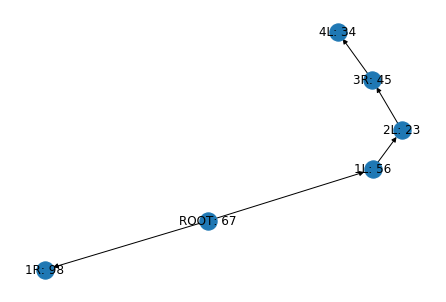

In [19]:
bst.graph()

In [20]:
bst.insert(64)

In [21]:
bst.insert(156)

In [22]:
bst.insert(111)

Nodes of graph:  [67, 56, 98, 23, 64, 156, 45, 111, 34]


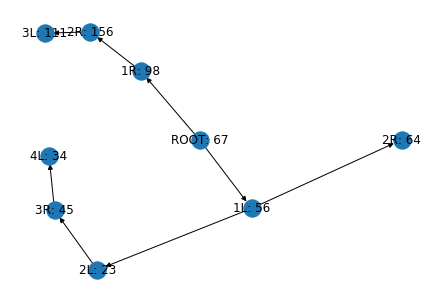

In [23]:
bst.graph()

In [24]:
bst.insert(111)

Nodes of graph:  [67, 56, 98, 23, 64, 156, 45, 111, 34]


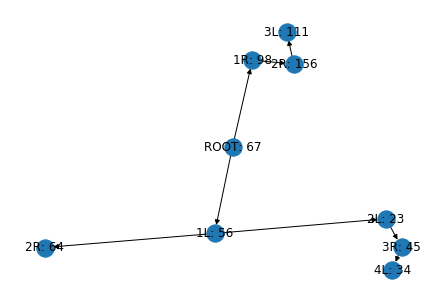

In [25]:
bst.graph()

In [67]:
bst2 = BinarySearchTree()

In [68]:
for i in np.random.randint(1, 500, 10):
    bst2.insert(i)

Nodes of graph:  [420, 226, 137, 408, 171, 287, 156, 398, 140, 149]


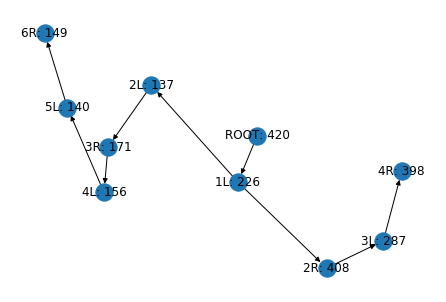

In [69]:
bst2.graph()

In [64]:
bst2.remove(474)

True

Nodes of graph:  [176, 76, 312, 102, 302, 456, 220, 363, 469]


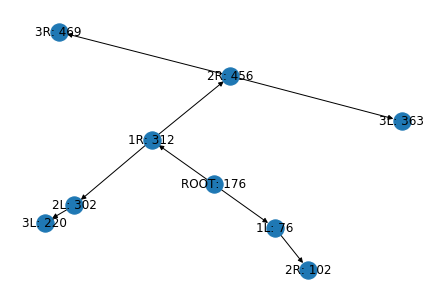

In [66]:
bst2.graph()